In [229]:
import numpy as np

In [230]:
import math

In [231]:
import matplotlib.pyplot as plt

In [232]:
import sympy

In [233]:
from sympy import *

In [235]:
import matplotlib.animation as animation

In [236]:
import random

In [237]:
np.set_printoptions(precision=3)

k = np.array(random.sample(range(1,100), 3))
kn = np.linalg.norm(k) #生成したベクトルの大きさ
n = k / kn #まずは単位ベクトル

def orthogonal_vector(n):
    # 入力ベクトルnが(0, 0, 0)でないことを確認
    if np.all(n == 0):
        raise ValueError("The input vector v should not be the zero vector.")

    # 直交ベクトルを計算
    if n[0] != 0:
        s = np.array([-(n[1] + n[2]) / n[0], 1, 1])
    elif n[1] != 0:
        s = np.array([1, -(n[0] + n[2]) / n[1], 1])
    else:
        s = np.array([1, 1, -(n[0] + n[1]) / n[2]])
    
    return s

# vに直交するベクトルを計算
s = orthogonal_vector(n)

# nとsの掛け算
j = n * s

# 確認のための内積計算
dot_product = np.dot(n, s)

# nとsの外積
c = np.cross(n, s)

print(f"Vector n: {n}")
print(f"Vector s: {s}")
print(f"Vector j: {j}")
print(f"Vector c: {c}")
print(f"Dot product: {dot_product}")

n1 = n[0]
n2 = n[1]
n3 = n[2]
c1 = c[0]
c2 = c[1]
c3 = c[2]
s1 = s[0]
s2 = s[1]
s3 = s[2]
C = Symbol('C')
S = Symbol('S')

#nの時の回転行列
T = sympy.Matrix([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

#n×sの時の回転行列
T_ver = sympy.Matrix([[c1**(2)*(1-C)+C, c1*c2*(1-C)-c3*S, c1*c3*(1-C)+c2*S], 
            [c1*c2*(1-C)+c3*S, c2**(2)*(1-C)+C, c2*c3*(1-C)-c1*S], 
            [c1*c3*(1-C)-c2*S, c2*c3*(1-C)+c1*S, c3**(2)*(1-C)+C]])

s_vector = sympy.Matrix([[s1], [s2], [s3]])

#nの時の磁場ベクトル
h = T*s_vector

#n×sの時の磁場ベクトル
h_ver = T_ver*s_vector

print(f"Vector h: {h}")
print(f"Vector h_ver: {h_ver}")

C = Symbol('C')
S = Symbol('S')

k_0 = Symbol('k_0')
k_U = Symbol('k_U')
k_V = Symbol('k_V')
k_X = Symbol('k_X')
k_Y = Symbol('k_Y')
k_Z = Symbol('k_Z')
XX = Symbol('XX')
XY = Symbol('XY')
YY = Symbol('YY')
YZ = Symbol('YZ')
ZZ = Symbol('ZZ')
ZX = Symbol('ZX')

K = sympy.Matrix([[XX, XY, ZX], [XY, YY, YZ], [ZX, YZ, ZZ]])

R2 = Matrix([[np.cos(np.radians(-120)), -np.sin(np.radians(-120)), 0], [np.sin(np.radians(-120)), np.cos(np.radians(-120)), 0], [0, 0, 1]])
R3 = Matrix([[np.cos(np.radians(120)), -np.sin(np.radians(120)), 0], [np.sin(np.radians(120)), np.cos(np.radians(120)), 0], [0, 0, 1]])

H_vector = sympy.Matrix([[h[0], h[1], h[2]]]) 
h_vector = sympy.Matrix([[h[0]], [h[1]], [h[2]]])

H_ver_vector = sympy.Matrix([[h_ver[0], h_ver[1], h_ver[2]]]) 
h_ver_vector = sympy.Matrix([[h_ver[0]], [h_ver[1]], [h_ver[2]]])

#nの時のナイトシフトの磁場角度依存性
K1 = H_vector*K*h_vector
K2 = H_vector*R2*K*R2**(-1)*h_vector
K3 = H_vector*R3*K*R3**(-1)*h_vector

#n×sの時のナイトシフトの磁場角度依存性
K1_ver = H_ver_vector*K*h_ver_vector
K2_ver = H_ver_vector*R2*K*R2**(-1)*h_ver_vector
K3_ver = H_ver_vector*R3*K*R3**(-1)*h_ver_vector

print(f"Vector K1: {K1}")
print(f"Vector K2: {K2}")
print(f"Vector K3: {K3}")
print(f"Vector K1_ver: {K1_ver}")
print(f"Vector K2_ver: {K2_ver}")
print(f"Vector K3_ver: {K3_ver}")

print(K1[0])
print(K2[0])
print(K3[0])
print(K1_ver[0])
print(K2_ver[0])
print(K3_ver[0])

Vector n: [0.925 0.263 0.274]
Vector s: [-0.58  1.    1.  ]
Vector j: [-0.537  0.263  0.274]
Vector c: [-0.011 -1.084  1.078]
Dot product: -5.551115123125783e-17
Vector h: Matrix([[-0.580246913580247*C - 0.0114213014035208*S - 5.55111512312578e-17], [1.0*C - 1.08417761100829*S - 2.77555756156289e-17], [1.0*C + 1.07755043611982*S - 4.16333634234434e-17]])
Vector h_ver: Matrix([[-0.580246913580247*C - 2.16172804712811*S + 1.73472347597681e-18], [1.0*C - 0.613824013382055*S + 2.22044604925031e-16], [1.0*C - 0.640512013963884*S]])
Vector K1: Matrix([[(-0.580246913580247*C - 0.0114213014035208*S - 5.55111512312578e-17)*(XX*(-0.580246913580247*C - 0.0114213014035208*S - 5.55111512312578e-17) + XY*(1.0*C - 1.08417761100829*S - 2.77555756156289e-17) + ZX*(1.0*C + 1.07755043611982*S - 4.16333634234434e-17)) + (1.0*C - 1.08417761100829*S - 2.77555756156289e-17)*(XY*(-0.580246913580247*C - 0.0114213014035208*S - 5.55111512312578e-17) + YY*(1.0*C - 1.08417761100829*S - 2.77555756156289e-17) + YZ*(

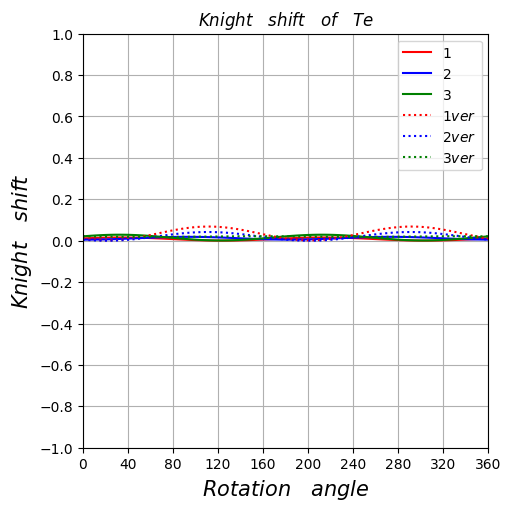

In [238]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15) 
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)

axes.set_xlim([0, 360])
axes.set_ylim([-1, 1])
axes.set_xticks(np.linspace(0, 360, 10))
axes.set_yticks(np.linspace(-1, 1, 11))
axes.grid()

x = np.linspace(0, 360, 100)

XX = random.uniform(10**(-2), 10**(-4))
YY = random.uniform(10**(-2), 10**(-4))
ZZ = random.uniform(10**(-2), 10**(-4))
XY = random.uniform(10**(-2), 10**(-4))
YZ = random.uniform(10**(-2), 10**(-4))
ZX = random.uniform(10**(-2), 10**(-4))
C = np.cos(np.radians(x))
S = np.sin(np.radians(x))

def Te1(x):
    return (1.0*C - 1.36589059016256*S)*(XY*(-0.953125*C - 0.497307743664016*S - 5.55111512312578e-17) + YY*(1.0*C - 1.36589059016256*S) + YZ*(1.0*C + 0.891894146982797*S)) + (1.0*C + 0.891894146982797*S)*(YZ*(1.0*C - 1.36589059016256*S) + ZX*(-0.953125*C - 0.497307743664016*S - 5.55111512312578e-17) + ZZ*(1.0*C + 0.891894146982797*S)) + (-0.953125*C - 0.497307743664016*S - 5.55111512312578e-17)*(XX*(-0.953125*C - 0.497307743664016*S - 5.55111512312578e-17) + XY*(1.0*C - 1.36589059016256*S) + ZX*(1.0*C + 0.891894146982797*S))

def Te2(x):
    return (1.0*C - 1.36589059016256*S)*(-0.866025403784439*XX*(-0.389462903784439*C + 1.43154982170291*S + 2.77555756156289e-17) - 0.866025403784439*XY*(-1.32543046298204*C + 0.252264155569523*S - 4.80740671595891e-17) - 0.5*XY*(-0.389462903784439*C + 1.43154982170291*S + 2.77555756156289e-17) - 0.5*YY*(-1.32543046298204*C + 0.252264155569523*S - 4.80740671595891e-17) - 0.5*YZ*(1.0*C + 0.891894146982797*S) - 0.866025403784439*ZX*(1.0*C + 0.891894146982797*S)) + (1.0*C + 0.891894146982797*S)*(YZ*(-1.32543046298204*C + 0.252264155569523*S - 4.80740671595891e-17) + ZX*(-0.389462903784439*C + 1.43154982170291*S + 2.77555756156289e-17) + ZZ*(1.0*C + 0.891894146982797*S)) + (-0.953125*C - 0.497307743664016*S - 5.55111512312578e-17)*(-0.5*XX*(-0.389462903784439*C + 1.43154982170291*S + 2.77555756156289e-17) - 0.5*XY*(-1.32543046298204*C + 0.252264155569523*S - 4.80740671595891e-17) + 0.866025403784439*XY*(-0.389462903784439*C + 1.43154982170291*S + 2.77555756156289e-17) + 0.866025403784439*YY*(-1.32543046298204*C + 0.252264155569523*S - 4.80740671595891e-17) + 0.866025403784439*YZ*(1.0*C + 0.891894146982797*S) - 0.5*ZX*(1.0*C + 0.891894146982797*S))

def Te3(x):
    return (1.0*C - 1.36589059016256*S)*(0.866025403784439*XX*(1.34258790378444*C - 0.934242078038891*S + 2.77555756156289e-17) + 0.866025403784439*XY*(0.325430462982043*C + 1.11362643459304*S + 4.80740671595891e-17) - 0.5*XY*(1.34258790378444*C - 0.934242078038891*S + 2.77555756156289e-17) - 0.5*YY*(0.325430462982043*C + 1.11362643459304*S + 4.80740671595891e-17) - 0.5*YZ*(1.0*C + 0.891894146982797*S) + 0.866025403784439*ZX*(1.0*C + 0.891894146982797*S)) + (1.0*C + 0.891894146982797*S)*(YZ*(0.325430462982043*C + 1.11362643459304*S + 4.80740671595891e-17) + ZX*(1.34258790378444*C - 0.934242078038891*S + 2.77555756156289e-17) + ZZ*(1.0*C + 0.891894146982797*S)) + (-0.953125*C - 0.497307743664016*S - 5.55111512312578e-17)*(-0.5*XX*(1.34258790378444*C - 0.934242078038891*S + 2.77555756156289e-17) - 0.5*XY*(0.325430462982043*C + 1.11362643459304*S + 4.80740671595891e-17) - 0.866025403784439*XY*(1.34258790378444*C - 0.934242078038891*S + 2.77555756156289e-17) - 0.866025403784439*YY*(0.325430462982043*C + 1.11362643459304*S + 4.80740671595891e-17) - 0.866025403784439*YZ*(1.0*C + 0.891894146982797*S) - 0.5*ZX*(1.0*C + 0.891894146982797*S))

def Tev1(x):
    return (1.0*C - 0.352778865178963*S)*(XY*(-0.953125*C - 2.25778473714536*S + 5.55111512312578e-17) + YY*(1.0*C - 0.352778865178963*S) + YZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16)) + (-0.953125*C - 2.25778473714536*S + 5.55111512312578e-17)*(XX*(-0.953125*C - 2.25778473714536*S + 5.55111512312578e-17) + XY*(1.0*C - 0.352778865178963*S) + ZX*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16)) + (1.0*C - 1.79917221241271*S - 1.11022302462516e-16)*(YZ*(1.0*C - 0.352778865178963*S) + ZX*(-0.953125*C - 2.25778473714536*S + 5.55111512312578e-17) + ZZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16))

def Tev2(x):
    return (1.0*C - 0.352778865178963*S)*(-0.866025403784439*XX*(-0.389462903784439*C + 1.43440782773591*S - 2.77555756156289e-17) - 0.866025403784439*XY*(-1.32543046298204*C - 1.77890950605517*S + 4.80740671595891e-17) - 0.5*XY*(-0.389462903784439*C + 1.43440782773591*S - 2.77555756156289e-17) - 0.5*YY*(-1.32543046298204*C - 1.77890950605517*S + 4.80740671595891e-17) - 0.5*YZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16) - 0.866025403784439*ZX*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16)) + (-0.953125*C - 2.25778473714536*S + 5.55111512312578e-17)*(-0.5*XX*(-0.389462903784439*C + 1.43440782773591*S - 2.77555756156289e-17) - 0.5*XY*(-1.32543046298204*C - 1.77890950605517*S + 4.80740671595891e-17) + 0.866025403784439*XY*(-0.389462903784439*C + 1.43440782773591*S - 2.77555756156289e-17) + 0.866025403784439*YY*(-1.32543046298204*C - 1.77890950605517*S + 4.80740671595891e-17) + 0.866025403784439*YZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16) - 0.5*ZX*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16)) + (1.0*C - 1.79917221241271*S - 1.11022302462516e-16)*(YZ*(-1.32543046298204*C - 1.77890950605517*S + 4.80740671595891e-17) + ZX*(-0.389462903784439*C + 1.43440782773591*S - 2.77555756156289e-17) + ZZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16))

def Tev3(x):
    return (1.0*C - 0.352778865178963*S)*(0.866025403784439*XX*(1.34258790378444*C + 0.823376909409453*S - 2.77555756156289e-17) + 0.866025403784439*XY*(0.325430462982043*C + 2.13168837123413*S - 4.80740671595891e-17) - 0.5*XY*(1.34258790378444*C + 0.823376909409453*S - 2.77555756156289e-17) - 0.5*YY*(0.325430462982043*C + 2.13168837123413*S - 4.80740671595891e-17) - 0.5*YZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16) + 0.866025403784439*ZX*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16)) + (-0.953125*C - 2.25778473714536*S + 5.55111512312578e-17)*(-0.5*XX*(1.34258790378444*C + 0.823376909409453*S - 2.77555756156289e-17) - 0.5*XY*(0.325430462982043*C + 2.13168837123413*S - 4.80740671595891e-17) - 0.866025403784439*XY*(1.34258790378444*C + 0.823376909409453*S - 2.77555756156289e-17) - 0.866025403784439*YY*(0.325430462982043*C + 2.13168837123413*S - 4.80740671595891e-17) - 0.866025403784439*YZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16) - 0.5*ZX*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16)) + (1.0*C - 1.79917221241271*S - 1.11022302462516e-16)*(YZ*(0.325430462982043*C + 2.13168837123413*S - 4.80740671595891e-17) + ZX*(1.34258790378444*C + 0.823376909409453*S - 2.77555756156289e-17) + ZZ*(1.0*C - 1.79917221241271*S - 1.11022302462516e-16))

ims=[]
im1 = axes.plot(x, Te1(x), color='red')
im2 = axes.plot(x, Te2(x), color='blue')
im3 = axes.plot(x, Te3(x), color='green')
im4 = axes.plot(x, Tev1(x), ":", color='red')
im5 = axes.plot(x, Tev2(x), ":", color='blue')
im6 = axes.plot(x, Tev3(x), ":", color='green')

axes.legend(['$1$','$2$','$3$','$1ver$','$2ver$','$3ver$'])

plt.show()